# Generating ASTs

ASTs can be generated with the standard ast library. The command is ast.parse. The tree can be printed using the astpretty package.

In [153]:
import astpretty

In [154]:
with open("parse_2013_2014.py", "r") as source:
    tree = ast.parse(source.read())
    
astpretty.pprint(tree)

Module(
    body=[
        FunctionDef(
            lineno=2,
            col_offset=0,
            name='parse_2013_2014',
            args=arguments(
                args=[
                    arg(lineno=2, col_offset=20, arg='self', annotation=None),
                    arg(lineno=2, col_offset=26, arg='response', annotation=None),
                ],
                vararg=None,
                kwonlyargs=[],
                kw_defaults=[],
                kwarg=None,
                defaults=[],
            ),
            body=[
                Assign(
                    lineno=4,
                    col_offset=4,
                    targets=[Name(lineno=4, col_offset=4, id='all_people', ctx=Store())],
                    value=Call(
                        lineno=4,
                        col_offset=17,
                        func=Attribute(
                            lineno=4,
                            col_offset=17,
                            value=Name(lineno=4, col_offs

# Visualising ASTs Graphically

## Method 1: ctree

ctree is a package made for visualising ASTs in IPython. This method has fewer lines in the tree, but the layout of the tree is quite complex and many lines cross over each other.

In [155]:
import ctree

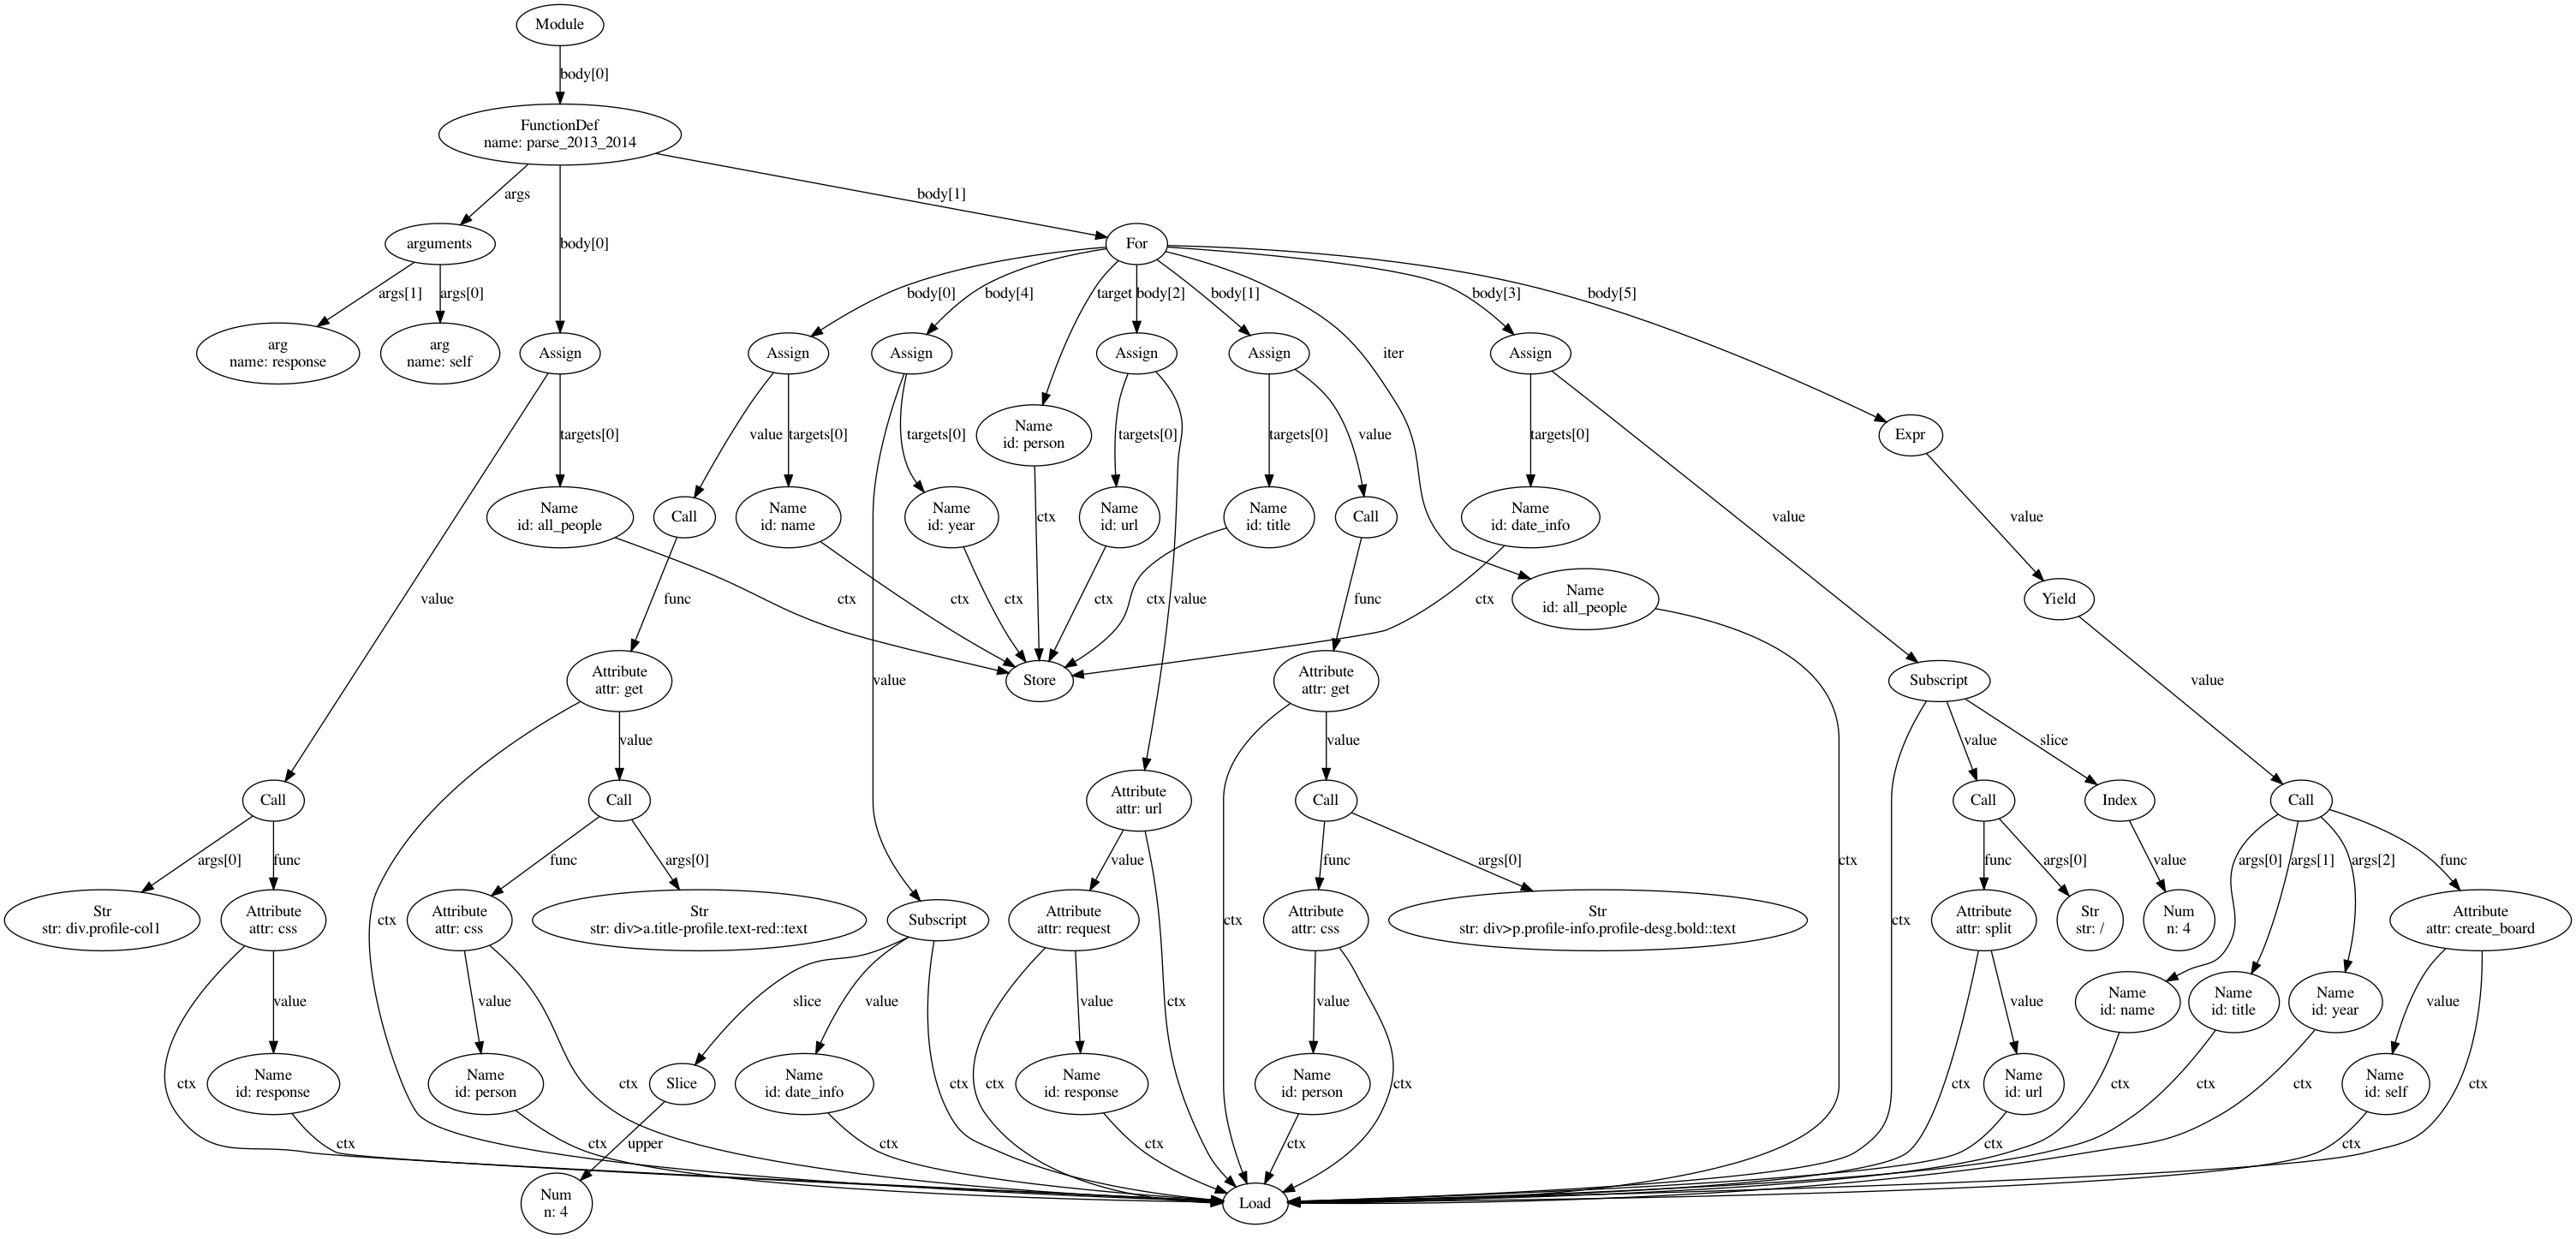

In [156]:
# parse the board from 2013-2014
def parse_2013_2014(self, response):
    # define selector that contains all items
    all_people = response.css("div.profile-col1")

    # iterate through items
    for person in all_people:
        # manually parse name
        name = person.css("div>a.title-profile.text-red::text").get()
        # manually parse title
        title = person.css("div>p.profile-info.profile-desg.bold::text").get()

        # find the year from the crawled URL
        url = response.request.url
        date_info = url.split("/")[4]
        year = date_info[:4]

        # Return item
        yield self.create_board(name,title,year)

tree1 = ctree.get_ast(parse_2013_2014)
ctree.ipython_show_ast(tree1)

## Method 2: ast-visualizer

This method visualizes the AST as a pdf file. Here there are more lines/nodes but the layout of the tree is much simpler (hierarchical) than ctree. The tree can be generated with `python astvisualizer.py -f FILENAME`

In [122]:
# parse the board from 2015-2018
def parse_2015_2018(self, response):
    # define selector that contains all items
    all_people = response.css("li.profile-col1")

    # iterate through items
    for person in all_people:
        # manually parse name
        name = person.css("div>h3>a.title-profile.text-red::text").get()
        # manually parse title
        title = person.css("div>p.profile-info::text").get()

        # find the year from the crawled URL
        url = response.request.url
        date_info = url.split("/")[4]
        year = date_info[:4]

        # Return item
        yield self.create_board(name,title,year)

<img src="ast-visualizer-test.png">